In [1]:
!pip install pennylane
import pennylane as qml
import numpy as np

  Using cached PennyLane-0.27.0-py3-none-any.whl (1.1 MB)
  Using cached retworkx-0.12.1-py3-none-any.whl (10 kB)
  Using cached autoray-0.5.3-py3-none-any.whl (39 kB)
  Using cached autograd-1.5-py3-none-any.whl (48 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached PennyLane_Lightning-0.27.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.4 MB)
  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)
  Using cached future-0.18.2-py3-none-any.whl
  Using cached rustworkx-0.12.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.9 MB)


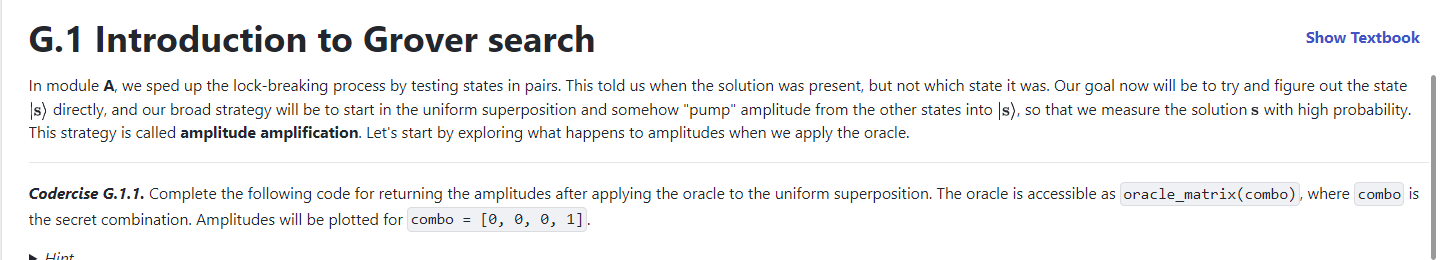

In [2]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    return qml.state()


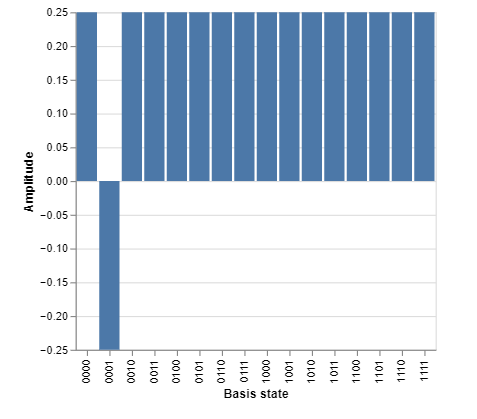

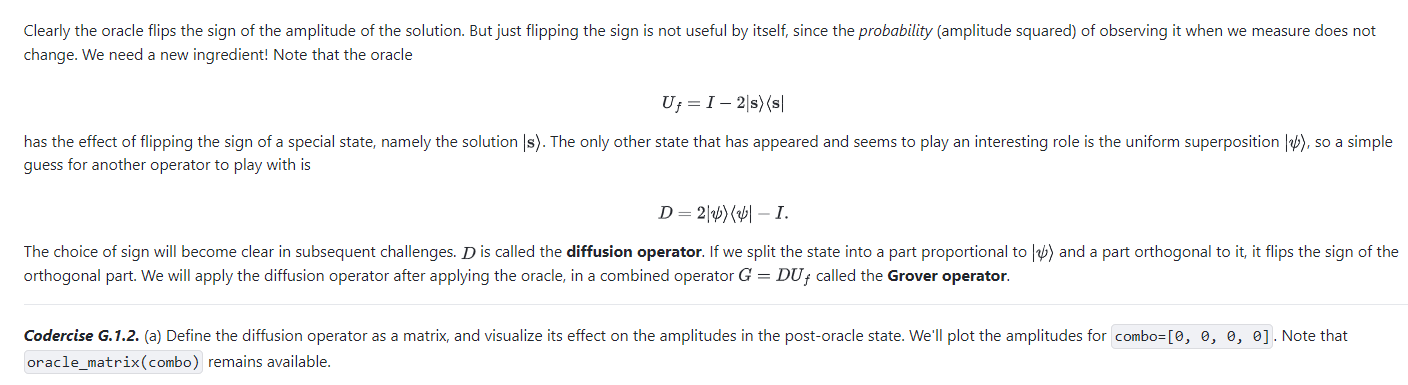

In [3]:
n_bits = 4

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    I = np.eye(2**n_bits)
    phi = 1/np.sqrt(2**n_bits) * np.ones(shape=(2**n_bits))
    return 2* np.outer(phi,phi)-I
    
@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(diffusion_matrix(), wires=[i for i in range(n_bits)])

    return qml.state()


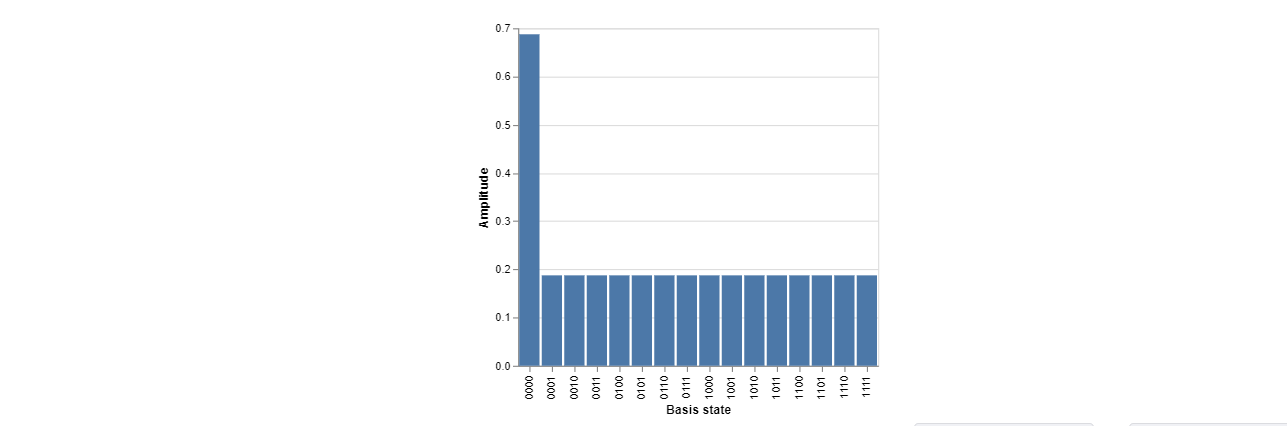

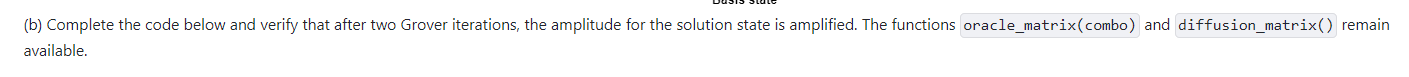

In [4]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    """Apply the Grover operator twice to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns: 
        array[complex]: The resulting quantum state.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    
    for i in range(n_bits):
        qml.Hadamard(wires=i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(diffusion_matrix(), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.QubitUnitary(diffusion_matrix(), wires=[i for i in range(n_bits)])
    
    return qml.state()


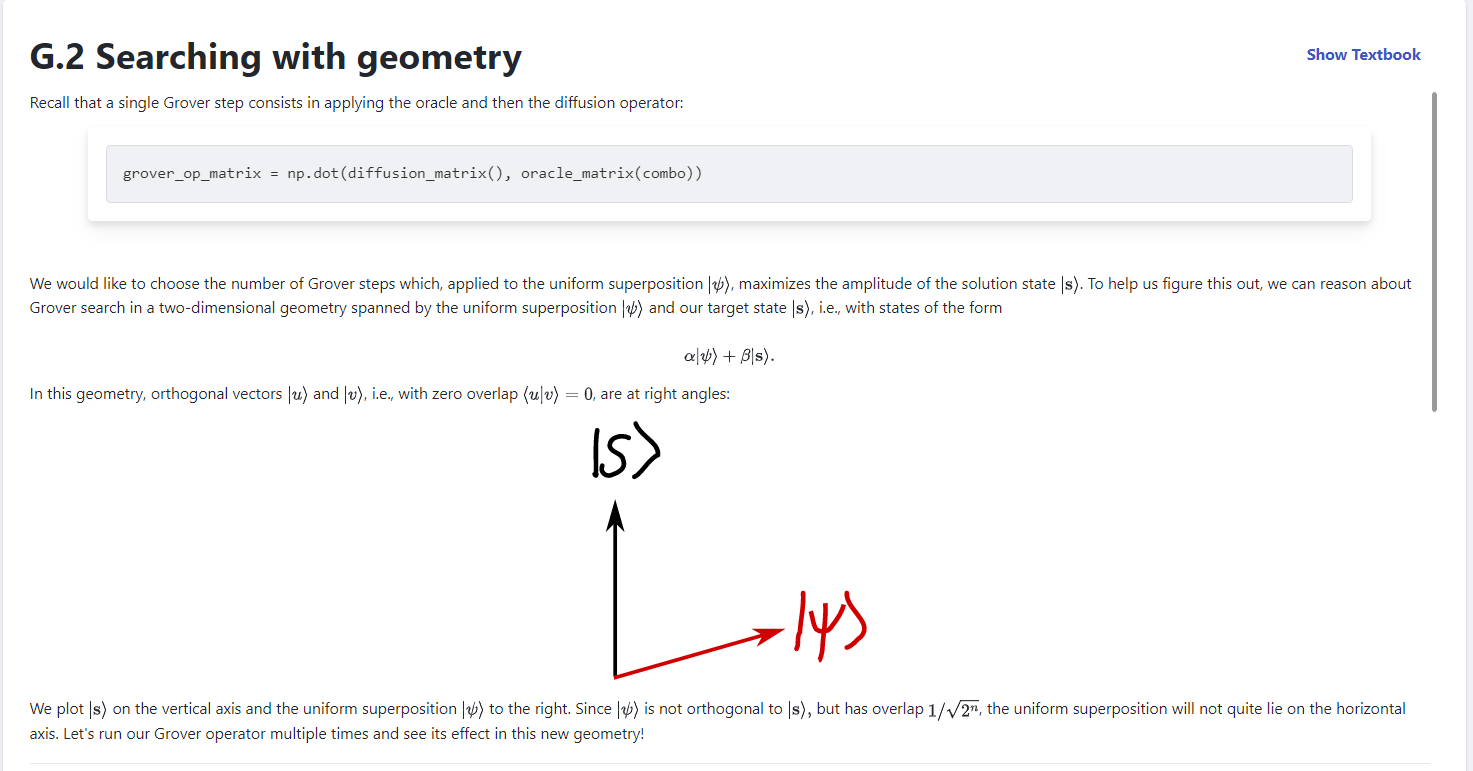
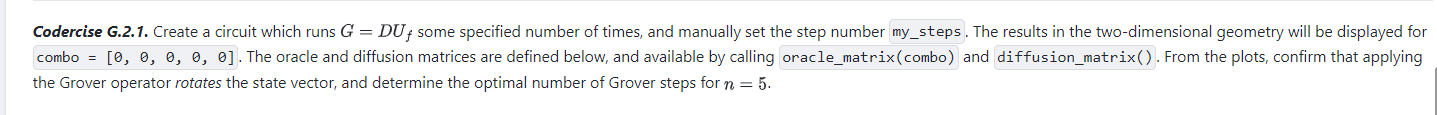

In [5]:
n_bits = 5
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1/2**n_bits)*np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return (2*psi_piece - ident_piece)

@qml.qnode(dev)
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition 
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns: 
        array[complex]: The quantum state (amplitudes) after repeated Grover 
        iterations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
    for j in range(num_steps):
        qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
        qml.QubitUnitary(diffusion_matrix(), wires=[i for i in range(n_bits)])


    return qml.state()


my_steps = 4 # YOUR STEP NUMBER HERE
print(my_steps)

4


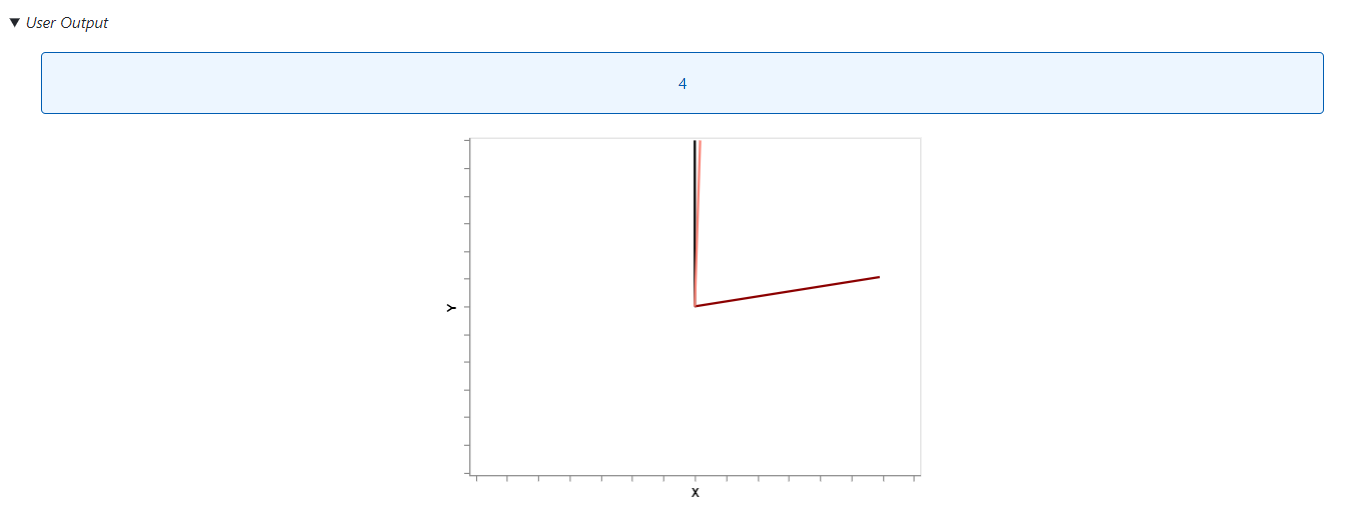
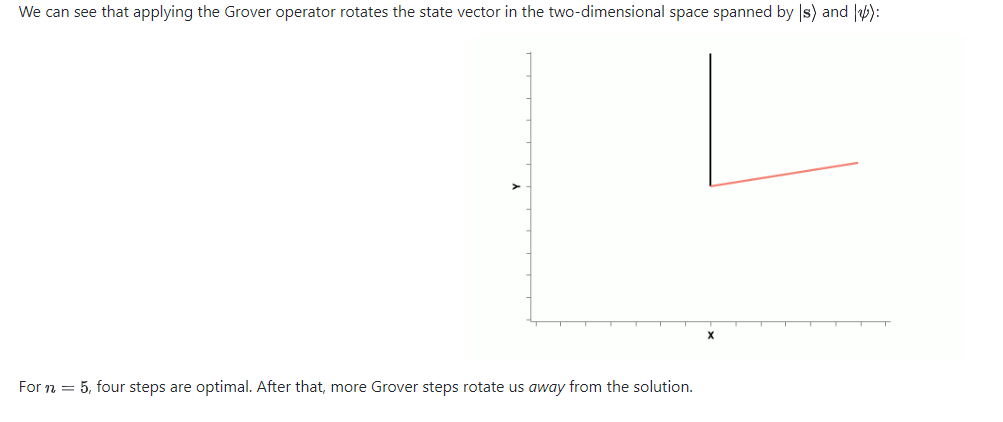

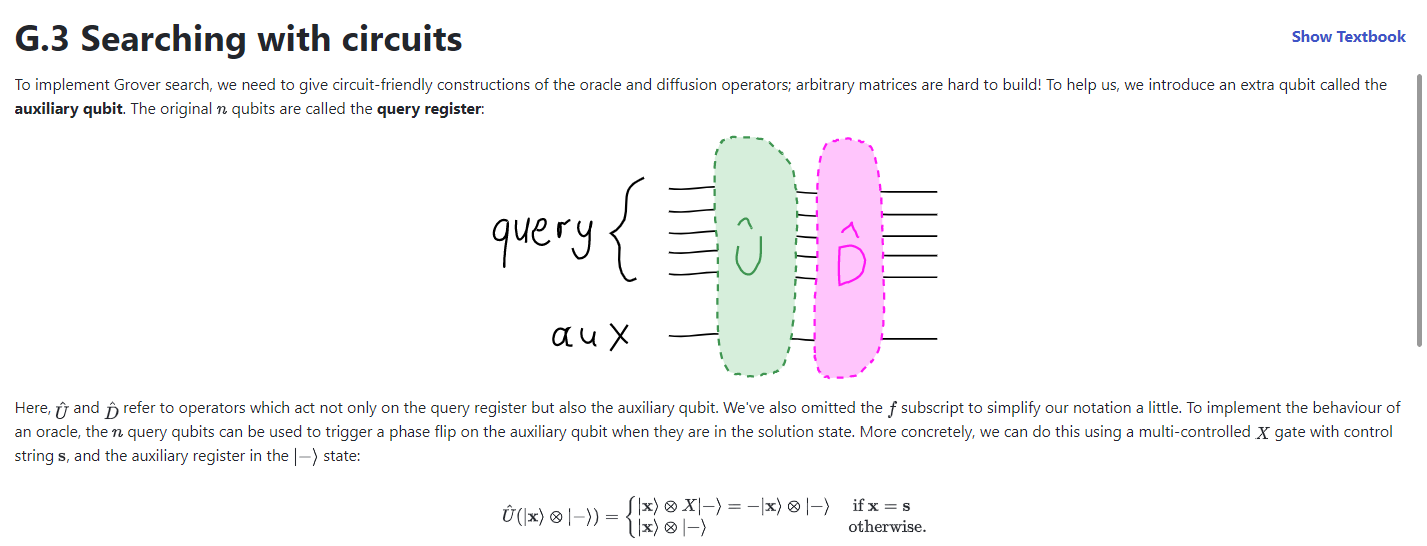
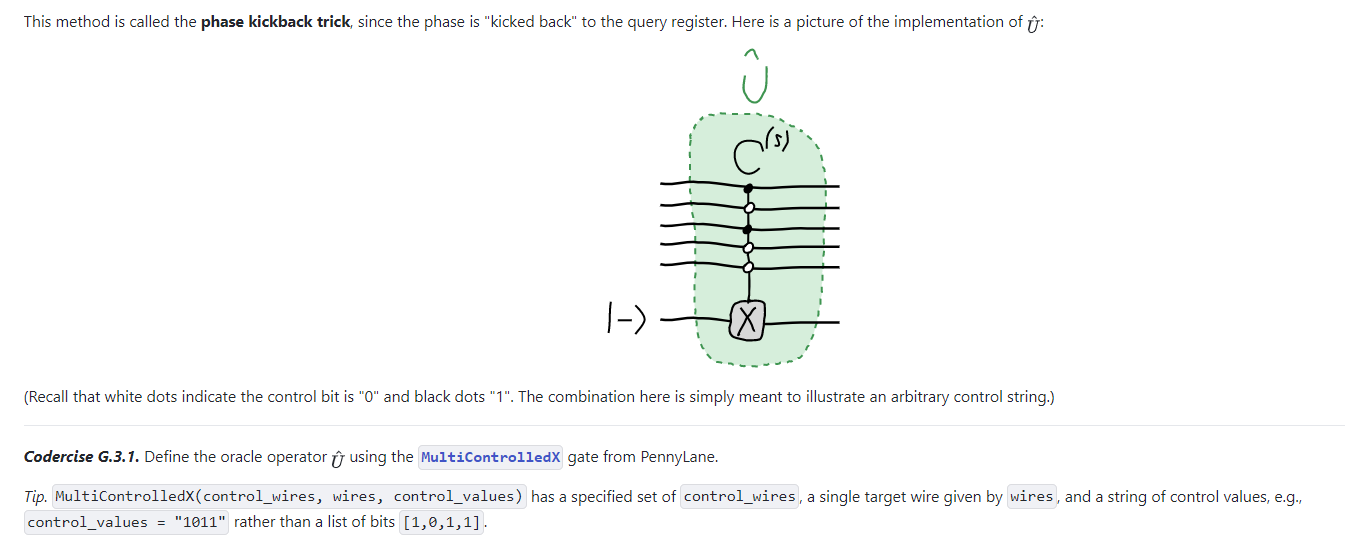

In [6]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires)

def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.
    
    Args:
        combo (list): A list of bits representing the secret combination.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.MultiControlledX(control_wires=query_register, wires=aux, control_values=str(''.join(str(i) for i in combo)))

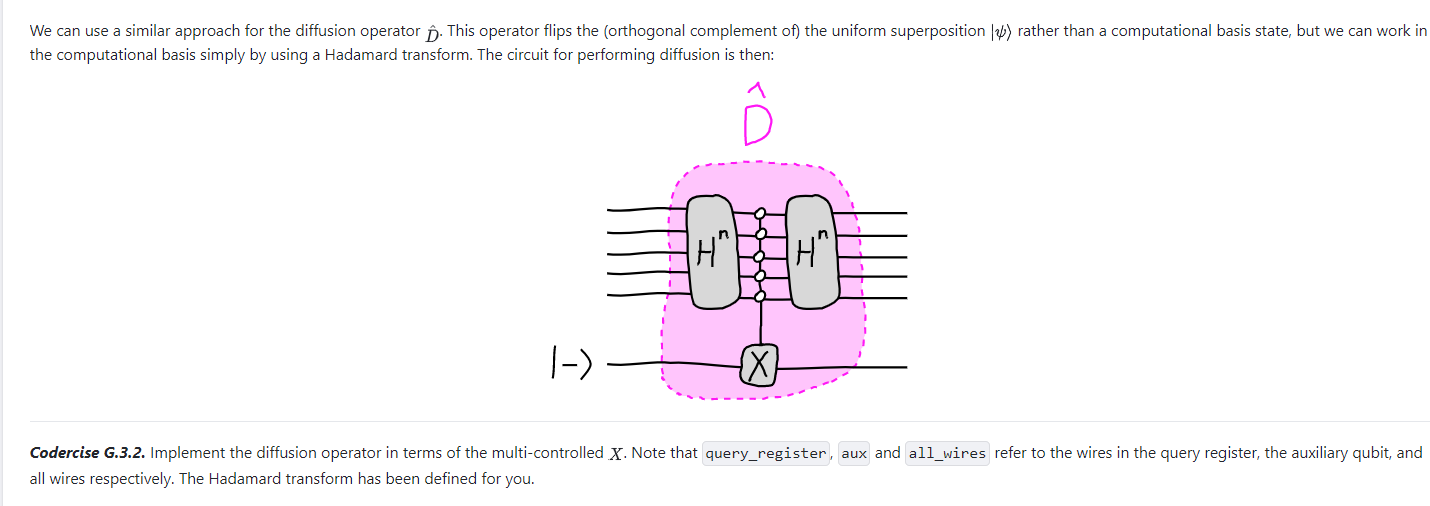

In [7]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.
    
    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion():
    """Implement the diffusion operator using the Hadamard transform and 
    multi-controlled X."""

    ##################
    # YOUR CODE HERE #
    ##################
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register, wires=aux, control_values='0'*len(query_register))
    hadamard_transform(query_register)


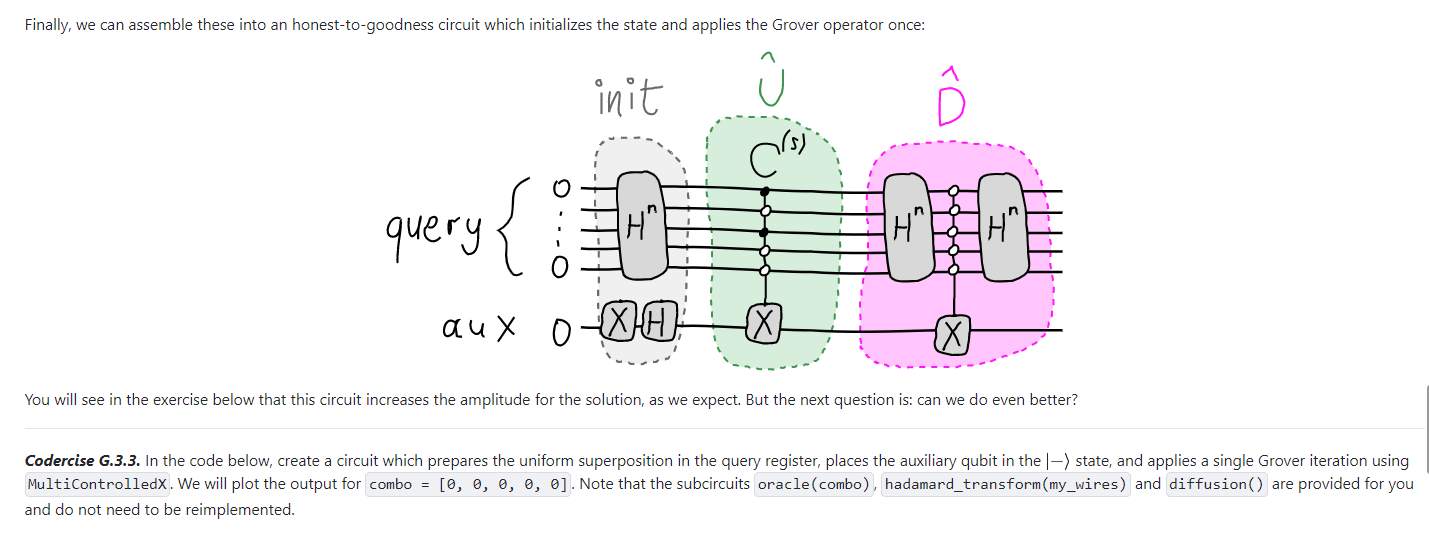

In [8]:
@qml.qnode(dev)
def grover_circuit(combo):
    """Apply the MultiControlledX Grover operator and return probabilities on 
    query register.
    
    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    # PREPARE QUERY AND AUXILIARY SYSTEM
    # APPLY GROVER ITERATION
    qml.PauliX(wires=aux)
    hadamard_transform(all_wires)
    oracle(combo)
    diffusion()

    return qml.probs(wires=query_register)


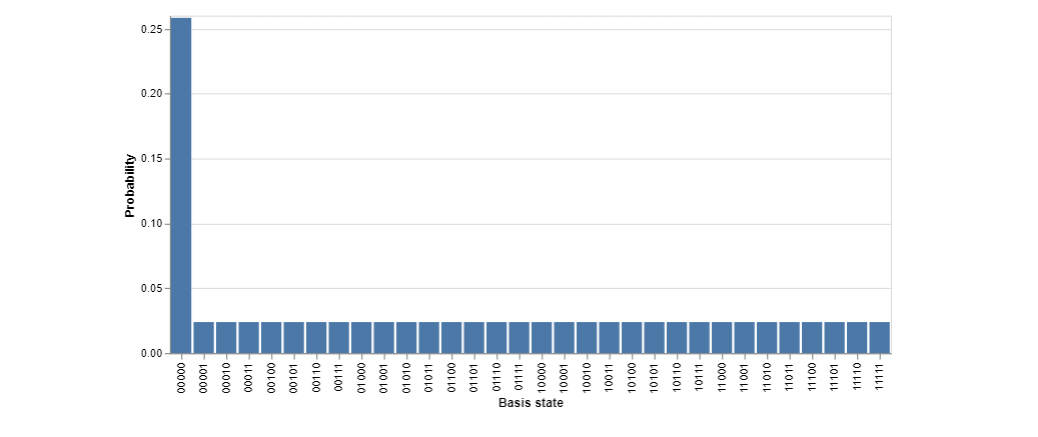

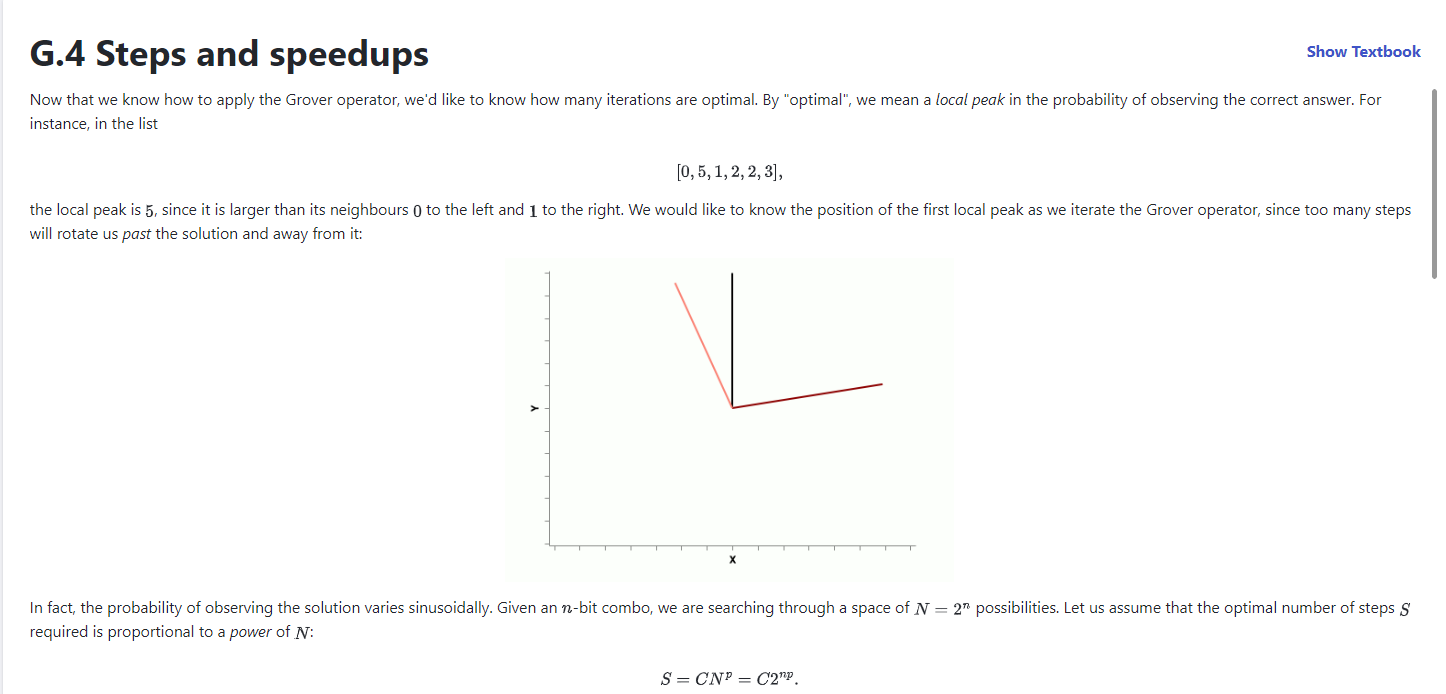
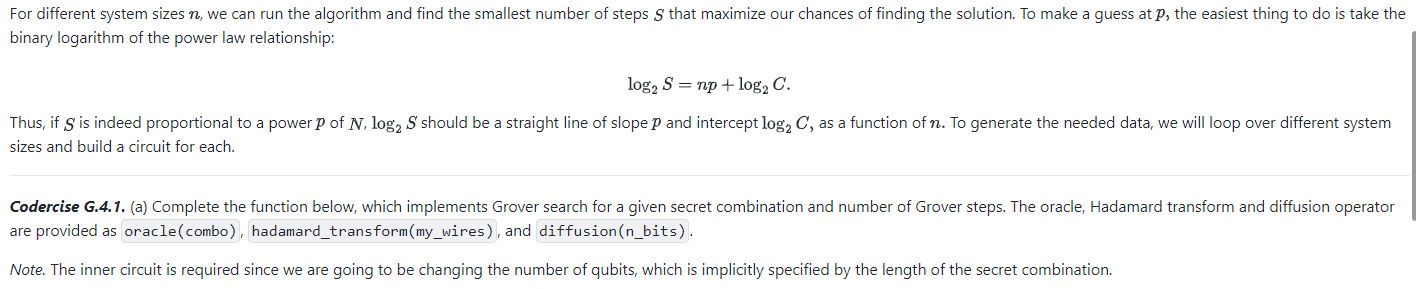

In [9]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.
    
    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register+aux
    dev = qml.device('default.qubit', wires=all_wires)

    @qml.qnode(dev)
    def inner_circuit():
        ##################
        # YOUR CODE HERE #
        ##################
        # IMPLEMENT THE GROVER CIRCUIT
        qml.PauliX(wires=aux)
        hadamard_transform(all_wires)
        for ind in range(num_steps):
            oracle(combo) # try searching algo
            diffusion(n_bits)
        return qml.probs(wires=query_register)
    
    return inner_circuit()


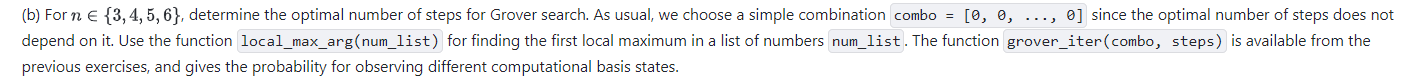

In [1]:
n_list = range(3,7)
opt_steps = []

for n_bits in n_list:
    combo = "0"*n_bits # A simple combination
    step_list = range(1,10) # Try out some large number of steps
    ##################
    # YOUR CODE HERE #
    ##################
    minss=[]
    for i in step_list:
        minss.append(grover_iter(combo, i)[0].numpy())
    opt_steps.append(local_max_arg(minss))
    
    
print("The optimal number of Grover steps for qubits in", [3,4,5,6], "is", opt_steps, ".")


NameError: name 'grover_iter' is not defined

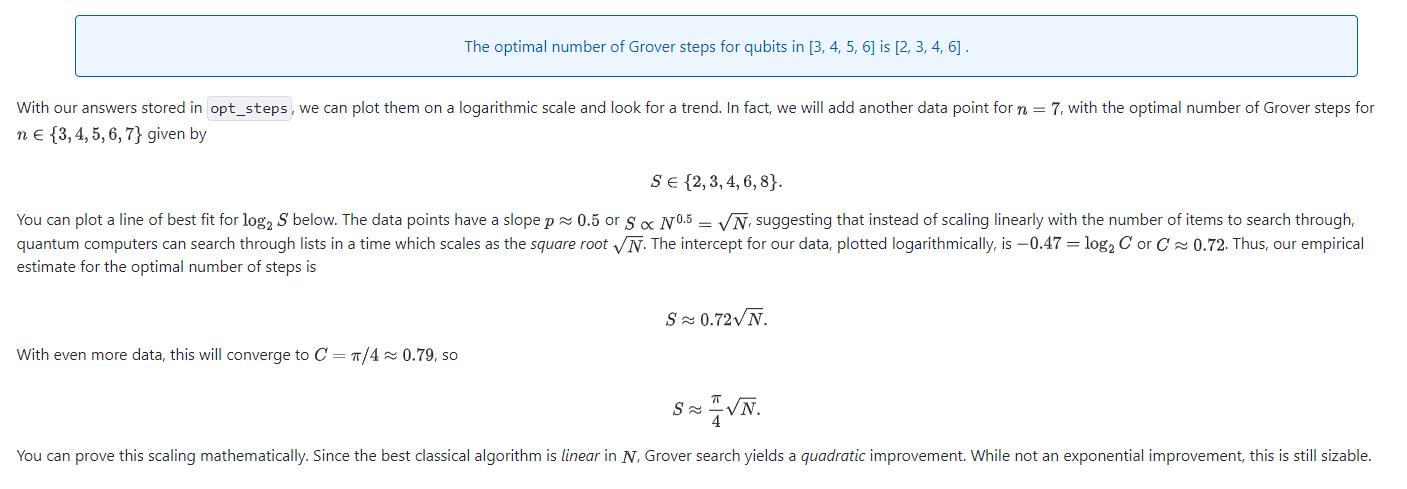

In [2]:
grad = 0.5
intercept = -0.47
# SUBMIT TO PLOT GRAPH

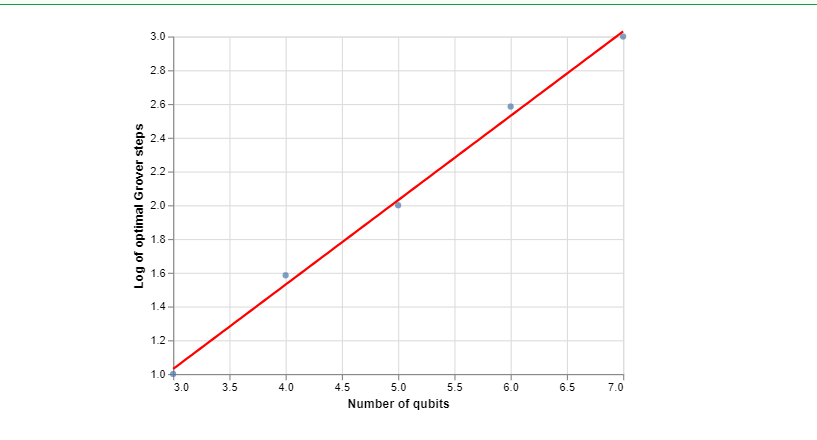

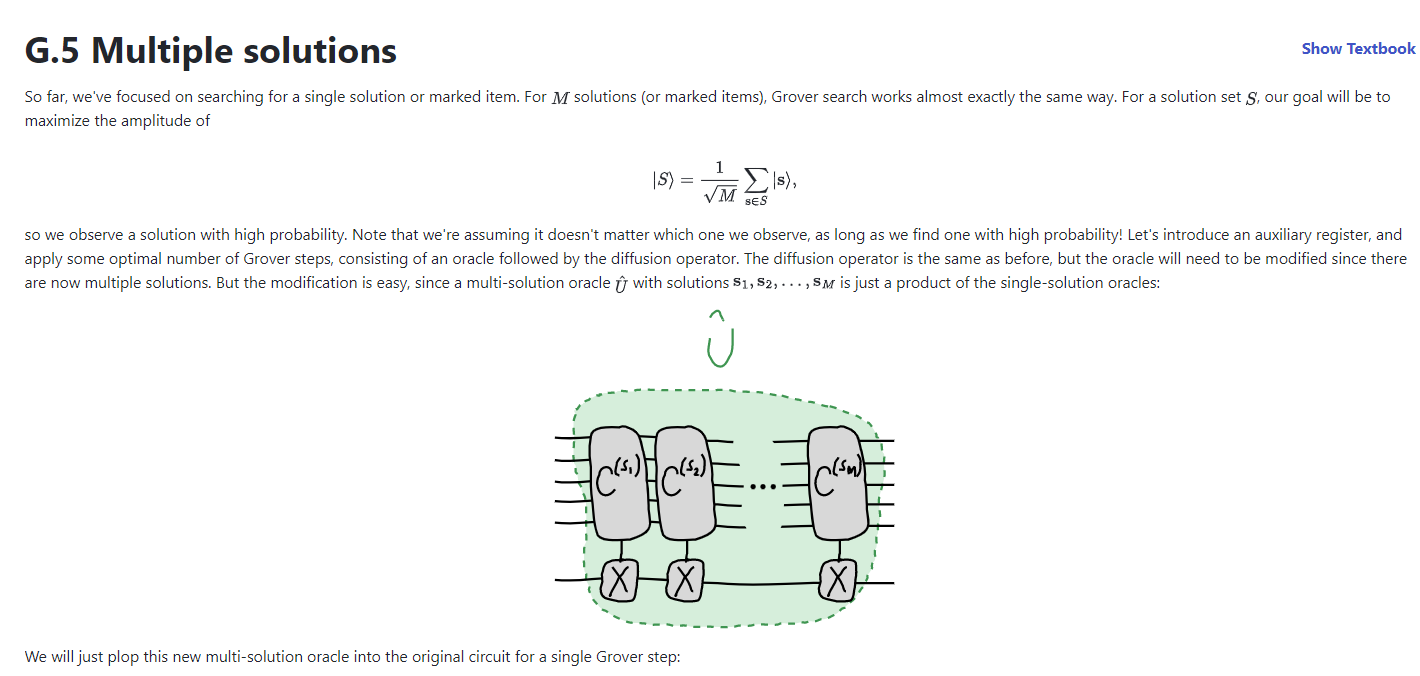
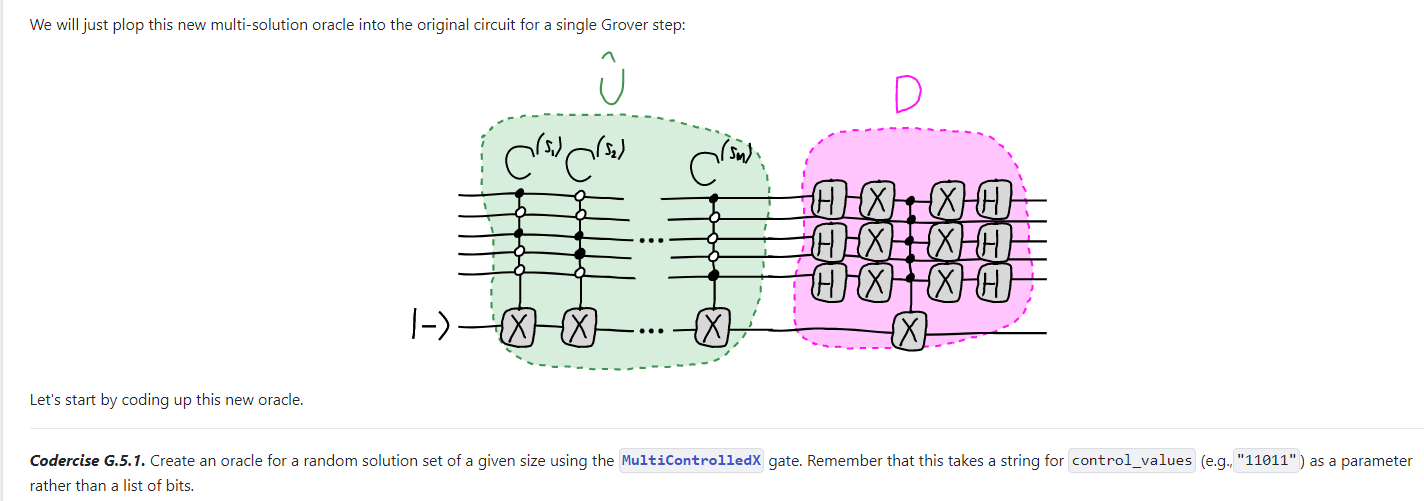

In [3]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires)

def oracle_multi(combos):
    """Implement multi-solution oracle using sequence of multi-controlled X gates.
    
    Args:
        combos (list[list[int]]): A list of solutions.
    """
    for combo in combos:
        combo_str = ''.join(str(j) for j in combo)
        ##################
        # YOUR CODE HERE #
        ##################
        qml.MultiControlledX(control_wires=query_register, wires=aux, control_values=combo_str)

NameError: name 'qml' is not defined

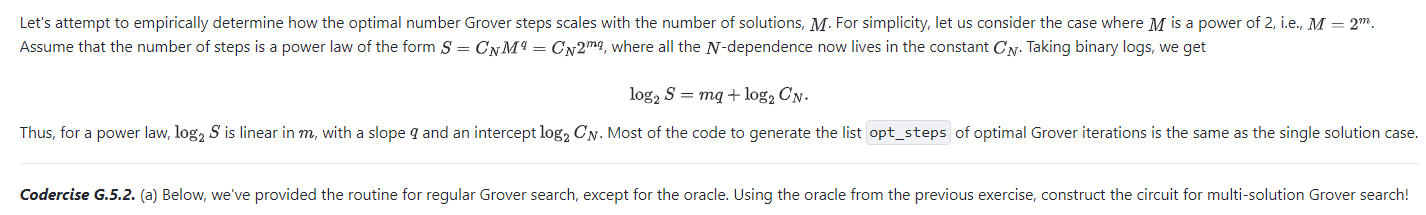

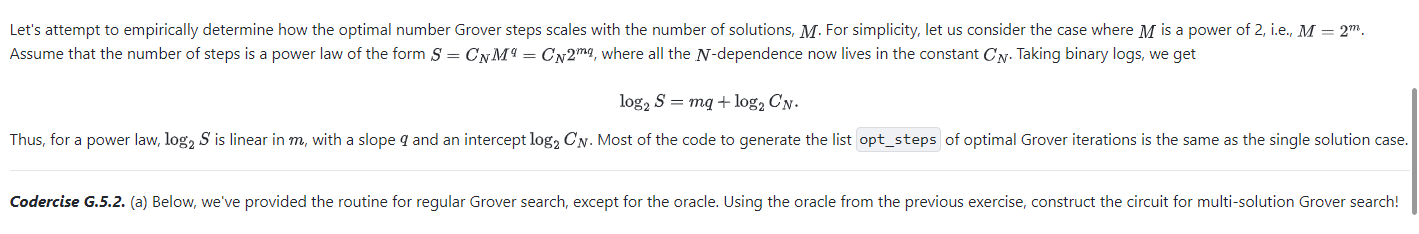

In [4]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires, shots=None)

def grover_iter_multi(combos, num_steps):
    """Run Grover search for multiple secret combinations and a number 
    of Grover steps.
    
    Args:
        combos (list[list[int]]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    @qml.qnode(dev)
    def inner_circuit():
        qml.PauliX(wires=n_bits)
        qml.Hadamard(wires=n_bits)
        hadamard_transform(query_register)

        for _ in range(num_steps):
            ##################
            # YOUR CODE HERE #
            ##################
            oracle_multi(combos)
            diffusion(n_bits)
        return qml.probs(wires=query_register)
    
    return inner_circuit()


NameError: name 'qml' is not defined